In [4]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('country.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


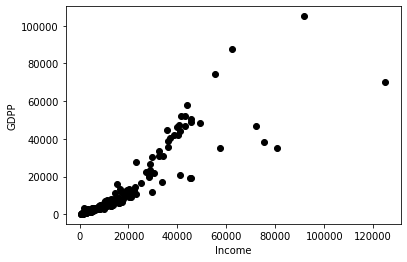

In [6]:

X = data[["income","gdpp"]]
#Visualise data points
plt.scatter(X["income"],X["gdpp"],c='black')
plt.xlabel('Income')
plt.ylabel('GDPP')
plt.show()

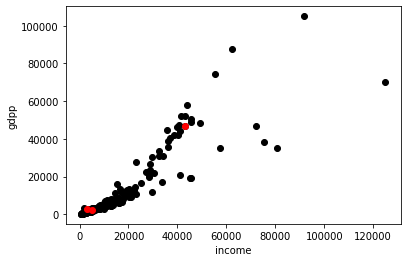

In [7]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["income"],X["gdpp"],c='black')
plt.scatter(Centroids["income"],Centroids["gdpp"],c='red')
plt.xlabel('income')
plt.ylabel('gdpp')
plt.show()

In [8]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["income"]-row_d["income"])**2
            d2=(row_c["gdpp"]-row_d["gdpp"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["gdpp","income"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['gdpp'] - Centroids['gdpp']).sum() + (Centroids_new['income'] - Centroids['income']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["gdpp","income"]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


14940.292535877104
7054.212672670794
6321.113701676431
10580.679623591655
3676.288848260466
2161.9468079914927
1731.4000233726347
2820.853877104576
1266.753438890728
658.9123950293688
0.0


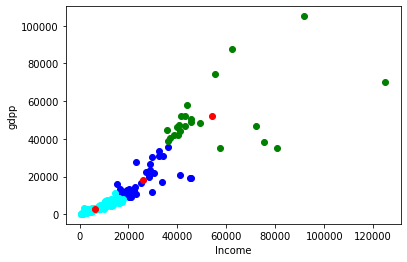

In [9]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["income"],data["gdpp"],c=color[k])
plt.scatter(Centroids["income"],Centroids["gdpp"],c='red')
plt.xlabel('Income')
plt.ylabel('gdpp')
plt.show()